# Generate an overview of the experiment's data

Import the data and transform it

In [5]:
# Imports
import numpy as np
import pandas as pd

import glob
import os

from transform_data import *

# Load the data from the data folder
landmarks_files = glob.glob(os.path.join("data/", "*_landmark.npy"))
distances_files = glob.glob(os.path.join("data/", "*_distance.npy"))

landmarks_list = [np.load(file) for file in landmarks_files]
distances_list = [np.load(file) for file in distances_files]


Create an overview of the data

In [6]:
import matplotlib.pyplot as plt

# Simple function for distances to self-report count
def processSignal(signal):
    middle_distance = (np.mean(signal) // 2) # Threshold for the binary decision
    roundBinary = np.vectorize(lambda t: 1 if (t < middle_distance) else 0)
    return count_rep(roundBinary(signal))

# List the number of self-reports for each participant
self_report_count_df = pd.DataFrame([processSignal(distances) for distances in distances_list])
print("Number of self-reports statistics:")
self_report_count_df.describe()



Number of self-reports statistics:


,0
count,21.000000
mean,10.285714
std,10.349603
min,1.000000
25%,4.000000
50%,6.000000
75%,11.000000
max,42.000000


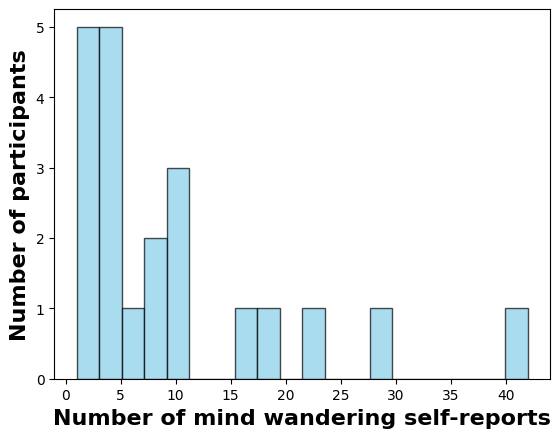

In [7]:
# Draw histogram of the self-report data
plt.hist(self_report_count_df, 20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Number of mind wandering self-reports", fontsize=16, fontweight='bold')
plt.xticks(range(0, 45, 5))
plt.ylabel("Number of participants", fontsize=16, fontweight='bold')
plt.show()

In [8]:
# List the time in minutes of each video (30 fps * 60 seconds per minute)
video_length_count_df = pd.DataFrame([(len(distances) / (30 * 60)) for distances in distances_list if len(distances) > (30*60*6)])
print("Minutes of reading statistics:")
video_length_count_df.describe()


Minutes of reading statistics:


,0
count,20.000000
mean,13.531361
std,3.137012
min,8.512778
25%,11.544028
50%,13.027778
75%,14.796944
max,20.277778
